In [1]:
using Plots
using Distributions
using LinearAlgebra
pyplot()

Plots.PyPlotBackend()

Consider a Gaussian random variable $\mathrm{X} \in \mathbb{R}^{N_x}$  with mean $\mu_i = cos(\frac{2 \pi i}{N_x})$ and a diagonal covariance matrix $\Sigma_{i,i}  = (\frac{i}{100})^2$

In [51]:
Nx = 100
μ(Nx) = cos.((2*π/Nx)*collect(1:Nx))
Σ(Nx) = Diagonal((collect(1:Nx)./Nx).^2)
D = MvNormal(μ(Nx), Σ(Nx))

DiagNormal(
dim: 100
μ: [0.9980267284282716, 0.9921147013144779, 0.9822872507286887, 0.9685831611286311, 0.9510565162951535, 0.9297764858882515, 0.9048270524660195, 0.8763066800438636, 0.8443279255020151, 0.8090169943749475  …  0.8443279255020152, 0.8763066800438636, 0.9048270524660197, 0.9297764858882515, 0.9510565162951538, 0.9685831611286312, 0.9822872507286887, 0.9921147013144779, 0.9980267284282716, 1.0]
Σ: [0.0001 0.0 … 0.0 0.0; 0.0 0.0004 … 0.0 0.0; … ; 0.0 0.0 … 0.9801 0.0; 0.0 0.0 … 0.0 1.0]
)


With a small number of samples $N_e = 10$

In [52]:
Ne = 10
X = rand(D, Ne)

100×10 Array{Float64,2}:
  0.984265    1.00082     0.990246  …   0.990094    0.992749   1.00562 
  1.0104      0.998454    0.979885      0.976393    0.955866   0.972263
  0.994311    1.06287     0.975919      0.994072    0.985491   0.970765
  1.09926     1.00745     0.920482      0.914024    0.950402   0.922262
  1.00257     0.940938    0.919456      0.912392    0.89006    0.921639
  0.913431    0.90745     0.89281   …   0.939373    0.959159   0.863921
  0.866959    0.943159    1.00578       0.931376    0.768256   0.837912
  0.779548    0.685461    1.0198        0.950964    0.846249   0.743174
  0.755029    0.91803     0.816714      0.806358    0.831538   0.911829
  0.723126    0.874789    0.763737      0.808064    0.810182   0.709597
  0.729236    0.646067    0.756827  …   0.880009    0.783766   0.644264
  0.618861    0.703173    0.799425      0.579097    0.838231   1.04971 
  0.680213    0.653232    0.423907      0.518395    0.627933   0.582136
  ⋮                                 ⋱  

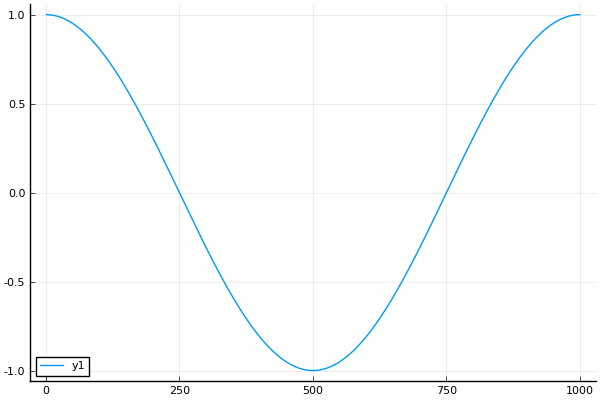

In [53]:
plot(μ(1000))

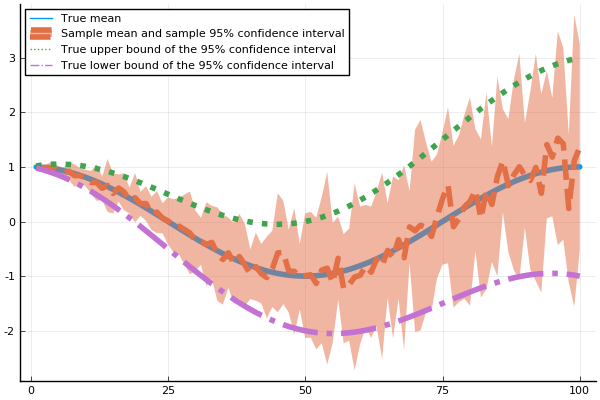

In [54]:
plt = plot(legend = :topleft)
plot!(plt, μ(Nx),  linewidth = 4, label = "True mean")
plot!(plt, mean(X; dims = 2),  linestyle = :auto, linewidth = 4, ribbon = 2*std(X; dims = 2), label = "Sample mean and sample 95% confidence interval")

plot!(plt, μ(Nx) + 2*sqrt.(Σ(Nx).diag), linewidth = 4, linestyle = :auto, label = "True upper bound of the 95% confidence interval")
plot!(plt, μ(Nx) - 2*sqrt.(Σ(Nx).diag), linewidth = 4, linestyle = :auto, label = "True lower bound of the 95% confidence interval")

Now use a larger ensemble $N_e = 1000$

In [22]:
Ne = 1000
X = rand(D, Ne)

100×1000 Array{Float64,2}:
  1.0002      0.987523   0.999098   …   0.990077    1.00056    0.996385
  0.98581     1.00185    0.978773       1.0064      0.983766   0.957495
  1.00938     0.99627    1.01263        0.9751      0.971321   1.02599 
  1.04174     0.943714   0.958309       0.923785    0.944054   1.01003 
  1.00587     1.06508    0.90459        0.91706     1.00682    0.964853
  1.02409     0.840656   0.847121   …   0.903187    0.937654   0.962572
  0.980847    0.885685   0.841266       0.950601    0.943374   0.930925
  0.754204    0.802687   0.876742       1.07969     0.811642   0.835642
  0.806181    0.79563    0.769594       0.538459    0.850296   0.89809 
  0.73286     0.701074   0.815856       0.856873    0.927815   0.845106
  0.905614    0.645776   0.773196   …   0.792325    0.805359   0.858078
  0.873886    0.506737   0.625424       0.583179    0.797676   0.703618
  0.654473    0.717832   0.744628       0.842324    0.866266   0.492086
  ⋮                                 ⋱

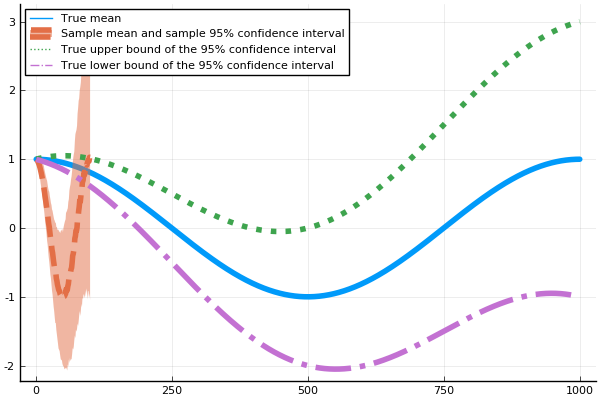

In [23]:
plt = plot(legend = :topleft)
plot!(plt, μ(Ne),  linewidth = 4, label = "True mean")
plot!(plt, mean(X; dims = 2),  linestyle = :auto, linewidth = 4, ribbon = 2*std(X; dims = 2), label = "Sample mean and sample 95% confidence interval")

plot!(plt, μ(Ne) + 2*sqrt.(Σ(Ne).diag), linewidth = 4, linestyle = :auto, label = "True upper bound of the 95% confidence interval")
plot!(plt, μ(Ne) - 2*sqrt.(Σ(Ne).diag), linewidth = 4, linestyle = :auto, label = "True lower bound of the 95% confidence interval")

As we increase the ensemble size, we get a better approximation of the true statistics of the distribution

In [57]:
std(X; dims = 2)

100×1 Array{Float64,2}:
 0.007600040010455713
 0.017800187426553447
 0.03338224235008783 
 0.05813547124362004 
 0.0417570989265133  
 0.044548765845472495
 0.08339561652702425 
 0.10237011875094598 
 0.07034702690492728 
 0.07617520673931323 
 0.10369893518962917 
 0.16744854104979046 
 0.10650620652198863 
 ⋮                   
 1.033804774545792   
 0.4785171047270323  
 0.816894455741193   
 1.0406188082336967  
 0.9082275037382511  
 0.6761144413152904  
 0.5411620686658045  
 0.9789231059093176  
 0.8780770253266793  
 0.6771058648611723  
 1.3365750459118169  
 0.9427820822606674  